In [70]:
import pandas as pd
import numpy as np

In [71]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
dataset=pd.concat(objs=[train,test]).reset_index(drop=True)
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [75]:
data=dataset.copy()
print(train.shape)
print(test.shape)
data.shape

(891, 12)
(418, 11)


(1309, 12)

In [76]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [77]:
if data.Age.isnull().sum()!=0:
    index_NaN_Age=list(data.Age[data.Age.isnull()].index)
    for i in index_NaN_Age:
        data.loc[i,'Age']=data['Age'][((data['SibSp']==data.iloc[i]['SibSp']) & (data['Parch']==data.iloc[i]['Parch']) & (data['Pclass']==data.iloc[i]['Pclass']))].median()

    data["Age"].fillna(data["Age"].median(),inplace=True)
    
if data.Fare.isnull().sum()!=0:
    data["Fare"].fillna(data["Fare"].median(),inplace=True)



In [78]:
data=pd.get_dummies(data,columns=["Embarked"],prefix="Embark")
data['Sex']=data['Sex'].map({"male":0,"female":1})

In [79]:
data['FamilySize']=data['Parch']+data['SibSp']+1

data['IsAlone']=data['FamilySize'].map({1:1})
data.IsAlone.fillna(0,inplace=True)

data_title=[i.split(',')[1].split('.')[0].strip() for i in data['Name']]
data['Title']=pd.Series(data_title)
data["Title"] = data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data["Title"] = data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})


In [80]:
data['AgeBin'] = pd.cut(data['Age'].astype(int), 5)#convert these too
data['FareBin'] = pd.qcut(data['Fare'].astype(int), 4)

#print(dataset['AgeBin'].sample(10))

unknown=pd.Series(data['Age'])

for i in range(len(unknown)):
    if (unknown[i]<=16):
        data.loc[i,"unknown"]=0
    elif(unknown[i]>16 and unknown[i]<=32):
        data.loc[i,"unknown"]=1
    elif (unknown[i]>32 and unknown[i]<=48):
        data.loc[i,"unknown"]=2
    elif (unknown[i]>48 and unknown[i]<=64):
        data.loc[i,"unknown"]=3
    elif(unknown[i]>64):
        data.loc[i,"unknown"]=4


unknownF=pd.Series(data['Fare'])

for i in range(len(unknownF)):
    if (unknownF[i]<=7.91):
        data.loc[i,"unknownF"]=0
    elif(unknownF[i]>7.91 and unknownF[i]<=14.454):
        data.loc[i,"unknownF"]=1
    elif (unknownF[i]>14.454 and unknownF[i]<=31):
        data.loc[i,"unknownF"]=2
    elif(unknownF[i]>31):
        data.loc[i,"unknownF"]=3


In [81]:
data.Cabin.fillna('U', inplace=True)
data['Cabin'] = data['Cabin'].map(lambda c : c[0])
data = pd.get_dummies(data,columns=['Cabin'], prefix='Cabin')    

In [82]:
def process_ticket():
    
    global data
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        #print(ticket)
        ticket = map(lambda t : t.strip(), ticket)
    
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        
        if len(ticket) >0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    data['Ticket'] = data['Ticket'].map(cleanTicket)
    data = pd.get_dummies(data,columns=['Ticket'], prefix='Ticket')
    
process_ticket()

In [83]:
data['Singleton'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if 5<=s else 0)


In [84]:
data.drop("PassengerId",axis=1,inplace=True)
data.drop("Name",axis=1,inplace=True)
data.drop(["AgeBin","FareBin","Age","Fare"],axis=1,inplace=True)
#try and remove age and fare the continous variable

In [85]:
for i in data.columns:
    print(i)

Parch
Pclass
Sex
SibSp
Survived
Embark_C
Embark_Q
Embark_S
FamilySize
IsAlone
Title
unknown
unknownF
Cabin_A
Cabin_B
Cabin_C
Cabin_D
Cabin_E
Cabin_F
Cabin_G
Cabin_T
Cabin_U
Ticket_A
Ticket_A4
Ticket_A5
Ticket_AQ3
Ticket_AQ4
Ticket_AS
Ticket_C
Ticket_CA
Ticket_CASOTON
Ticket_FC
Ticket_FCC
Ticket_Fa
Ticket_LINE
Ticket_LP
Ticket_PC
Ticket_PP
Ticket_PPP
Ticket_SC
Ticket_SCA3
Ticket_SCA4
Ticket_SCAH
Ticket_SCOW
Ticket_SCPARIS
Ticket_SCParis
Ticket_SOC
Ticket_SOP
Ticket_SOPP
Ticket_SOTONO2
Ticket_SOTONOQ
Ticket_SP
Ticket_STONO
Ticket_STONO2
Ticket_STONOQ
Ticket_SWPP
Ticket_WC
Ticket_WEP
Ticket_XXX
Singleton
SmallFamily
LargeFamily


In [86]:
data.drop(["Parch","SibSp"],axis=1,inplace=True)

In [87]:
data.head(10)

,Pclass,Sex,Survived,Embark_C,Embark_Q,Embark_S,FamilySize,IsAlone,Title,unknown,...,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Singleton,SmallFamily,LargeFamily
0,3,0,0.0,0,0,1,2,0.0,2,1.0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1.0,1,0,0,2,0.0,1,2.0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,1.0,0,0,1,1,1.0,1,1.0,...,0,1,0,0,0,0,0,1,0,0
3,1,1,1.0,0,0,1,2,0.0,1,2.0,...,0,0,0,0,0,0,1,0,1,0
4,3,0,0.0,0,0,1,1,1.0,2,2.0,...,0,0,0,0,0,0,1,1,0,0
5,3,0,0.0,0,1,0,1,1.0,2,1.0,...,0,0,0,0,0,0,1,1,0,0
6,1,0,0.0,0,0,1,1,1.0,2,3.0,...,0,0,0,0,0,0,1,1,0,0
7,3,0,0.0,0,0,1,5,0.0,0,0.0,...,0,0,0,0,0,0,1,0,0,1
8,3,1,1.0,0,0,1,3,0.0,1,1.0,...,0,0,0,0,0,0,1,0,1,0
9,2,1,1.0,1,0,0,2,0.0,1,0.0,...,0,0,0,0,0,0,1,0,1,0


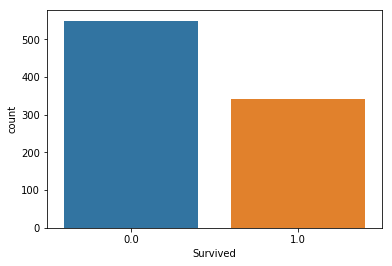

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data.Survived)
plt.show()

In [185]:
train_1=data[:len(train)]
test_1=data[len(train):]

ydata=train_1.Survived
xdata=train_1.drop(["Survived"],axis=1)

In [186]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

clf_Kbest= SelectKBest(chi2,      k=10)
xdata=clf_Kbest.fit_transform(xdata,ydata)
#xdata_2 = SelectKBest(f_classif, k=15).fit_transform(xdata,ydata)


In [187]:
from sklearn.model_selection import train_test_split
xtr,xval,ytr,yval=train_test_split(xdata,ydata,test_size=0.3,random_state=7)

In [173]:
xdata[:2]

array([[ 3.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.],
       [ 1.,  1.,  1.,  0.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.]])

In [188]:
test_1.drop(["Survived"],axis=1,inplace=True)
test_1=clf_Kbest.transform(test_1)

/home/harpreet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,StratifiedKFold

In soft voting, we predict the class labels based on the predicted probabilities p for classifier -- this approach is only recommended if the classifiers are well-calibrated.
In addition to the simple majority vote (hard voting) as described in the previous section, we can compute a weighted majority vote by associating a weight wj with classifier C.

In [189]:
ensemble_voting=VotingClassifier(estimators=[
                                            ("RandomTree",RandomForestClassifier(random_state=7,bootstrap=False,max_depth=8,max_features='auto',min_samples_leaf=3,min_samples_split=10,n_estimators=10)),                                             
                                            ("SVM_rbf",SVC(kernel="rbf",random_state=7,probability=True)),
                                            ("AdaBoost",AdaBoostClassifier(random_state=7)),
                                            ("Logisitic",LogisticRegression(random_state=7)),
                                            ("Gradient",GradientBoostingClassifier(random_state=7)),
                                            ("ExtraTree",ExtraTreesClassifier(random_state=7))
                                            ],voting="soft").fit(xtr,ytr)

print('The accuracy for ensembled model is:',ensemble_voting.score(xval,yval)*100)
scores=cross_val_score(ensemble_voting,xdata,ydata,cv=5)
print(scores)
print(scores.mean()*100)

cross_validation=StratifiedKFold(n_splits=10)
gridsearch=GridSearchCV(ensemble_voting,param_grid={},cv=cross_validation,scoring="accuracy")
model_grid=gridsearch.fit(xdata,ydata)
print(model_grid.best_score_*100)


The accuracy for ensembled model is: 78.7313432836
[ 0.81564246  0.82122905  0.8258427   0.80898876  0.86440678]
82.7221949743
82.8282828283


82.49495085976352-without age and fare which were continous variables.
82.719042253900739-without age,fare,SibSp,Parch
83.0527497194-with gridsearch cv=10,stratified# but this doesnt perform well on test set than ensemble

In [64]:
classifier_dict={"Logisitic":LogisticRegression(),
                 "LDA":LinearDiscriminantAnalysis(),
                 "QDA":QuadraticDiscriminantAnalysis(),
                 "ExtraTree":ExtraTreesClassifier(),
                 "RandomTree":RandomForestClassifier(),
                 "KNN":KNeighborsClassifier(),
                 "SVM_linear":SVC(kernel="linear"),
                 "SVM_rbf":SVC(kernel="rbf")
                }

In [182]:
y_pred_test=ensemble_voting.predict(test_1).astype(int)
print(y_pred_test.shape)#using grid_search classifier turns out to be a bad idea but gives better answer overall in training
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']

df_output['Survived'] =y_pred_test
df_output[['PassengerId','Survived']].to_csv('past79_ensemble_voting2.csv',index=False)

(418,)
